# ISYE6501x Homework 3 - Joel Quek

---

## Question 5.1

Using crime data from the file uscrime.txt (http://www.statsci.org/data/general/uscrime.txt, description at http://www.statsci.org/data/general/uscrime.html), test to see whether there are any outliers in the last column (number of crimes per 100,000 people).  Use the grubbs.test function in the outliers package in R.

### Install Libraries

In [19]:
install.packages("outliers")


  There is a binary version available but the source version is later:
         binary source needs_compilation
outliers   0.14   0.15             FALSE



installing the source package 'outliers'



In [20]:
library(outliers)

### Open Data as Data Frame

In [6]:
uscrime <- read.table("C:\\Users\\redoc\\OneDrive\\Desktop\\GTx Masters OMSA\\GTx - ISYE6501x Introduction to Analytics Modelling\\Week 3\\HW3\\Data\\uscrime.txt", header=TRUE)

  |Variable	| 	Description|
    |---|---|
|M	    |	percentage of males aged 14–24 in total state population|
|So	    |	indicator variable for a southern state|
|Ed	    |	mean years of schooling of the population aged 25 years or over|
|Po1    |		per capita expenditure on police protection in 1960|
|Po2    |		per capita expenditure on police protection in 1959|
|LF	    |	labour force participation rate of civilian urban males in the age-group 14-24|
|M.F    |		number of males per 100 females|
|Pop    |		state population in 1960 in hundred thousands|
|NW	    |	percentage of nonwhites in the population|
|U1	    |	unemployment rate of urban males 14–24|
|U2	    |	unemployment rate of urban males 35–39|
|Wealth	|	wealth: median value of transferable assets or family income|
|Ineq	|	income inequality: percentage of families earning below half the median income|
|Prob	|	probability of imprisonment: ratio of number of commitments to number of offenses|
|Time	|	average time in months served by offenders in state prisons before their first release|
|Crime	|	crime rate: number of offenses per 100,000 population in 1960|


In [7]:
head(uscrime)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [8]:
dim(uscrime)

[1] 47 16

There are 47 rows in the dataframe

### Visualisation of "Crime" Column

In [25]:
max(uscrime$Crime)

[1] 1993

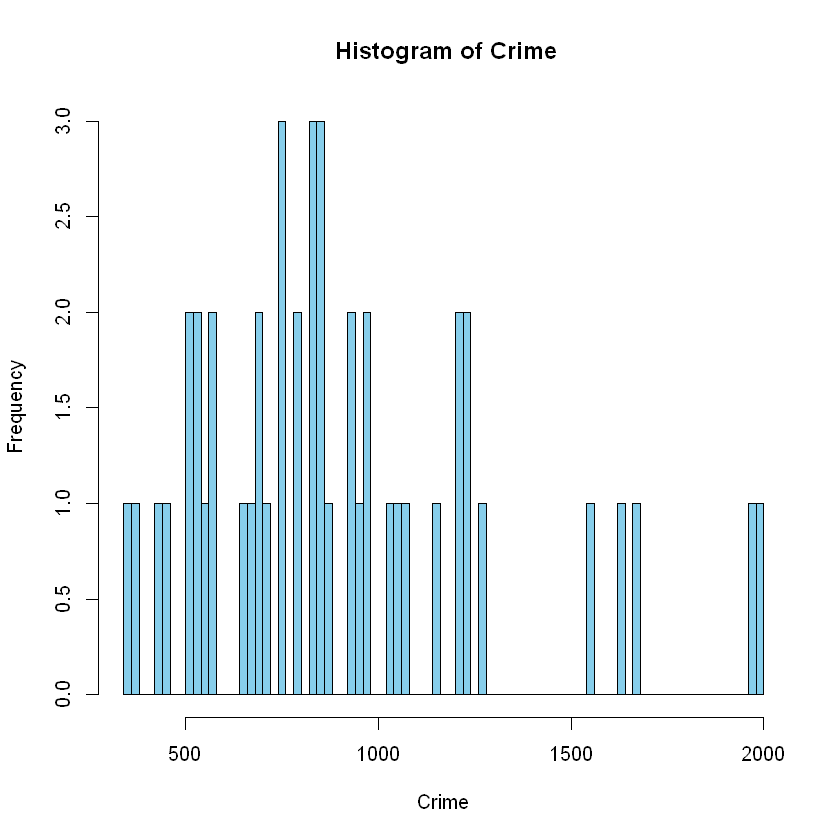

In [30]:
hist(uscrime$Crime, col= 'skyblue', breaks = 100, main = " Histogram of Crime", xlab = "Crime")

In [47]:
uscrime<-uscrime[order(uscrime$Crime,decreasing=TRUE),]

In [48]:
head(uscrime)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
26,13.1,0,12.1,16.0,14.3,0.631,107.1,3,7.7,0.102,4.1,6740,15.2,0.041698,22.1005,1993
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
11,12.4,0,10.5,12.1,11.6,0.580,96.6,101,10.6,0.077,3.5,6570,17.0,0.016201,41.6000,1674
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
8,13.1,1,10.9,11.5,10.9,0.542,96.9,50,17.9,0.079,3.5,4720,20.6,0.040099,24.5988,1555
36,15.0,0,10.0,10.9,9.8,0.531,96.4,9,2.4,0.087,3.8,5590,15.3,0.006900,44.0004,1272


Visually there appears to be 2 outliers. 

And based on the sorted dataframe, they appear to be 1993 and 1969

We have to check using Grubbs Outlier Test

### Grubbs Outlier Test

Source: https://www.youtube.com/watch?v=rcYN89Trt4Y

#### Two Tailed Test (One Outlier)

In [32]:
grubbs.test(uscrime$Crime, two.sided=TRUE)


	Grubbs test for one outlier

data:  uscrime$Crime
G = 2.81287, U = 0.82426, p-value = 0.1577
alternative hypothesis: highest value 1993 is an outlier


#### Two Tailed Test (One Outlier)

In [34]:
grubbs.test(uscrime$Crime)


	Grubbs test for one outlier

data:  uscrime$Crime
G = 2.81287, U = 0.82426, p-value = 0.07887
alternative hypothesis: highest value 1993 is an outlier


#### Check Lowest Value (One Outlier)

**Type 10** is a test for one outlier

**opposite=TRUE** checks for outliers on the other end of the dataset

In [51]:
grubbs.test(uscrime$Crime, type=10, opposite=TRUE)


	Grubbs test for one outlier

data:  uscrime$Crime
G = 1.45589, U = 0.95292, p-value = 1
alternative hypothesis: lowest value 342 is an outlier


#### Test for two Outliers

Type 11 is a test for two outliers on opposite tails

This portion is just for extra practice

In [57]:
grubbs.test(uscrime$Crime, type=11)


	Grubbs test for two opposite outliers

data:  uscrime$Crime
G = 4.26877, U = 0.78103, p-value = 1
alternative hypothesis: 342 and 1993 are outliers


#### Conclusion
At a 0.05 Level of Significance ($\alpha$), we can see that in ALL CASES, the **p-value > $\alpha$**, hence we cannot reject the null hypothesis. 

Since the extreme values are not outliers, we don't have to test for the second largest/smallest values.

**There are no outliers.**

---

## Question 6.1

Describe a situation or problem from your job, everyday life, current events, etc., for which a Change Detection model would be appropriate. Applying the CUSUM technique, how would you choose the critical value and the threshold?

### Response

I am an educator but also a recreational trader managing my own funds. 

When analysing chart patterns, I am applying time-series analysis on the price movements on a particular ETF/Stock over time. 

The **CUSUM** approach is especially appropriate during preiods of **price consolidation**. 
CUSUM would not work during trending markets as there is no oscillatory price action.

Setting an appropriate threshold to detect if price movements are too extreme will allow me to make an educated guess as to whether the price movement will **breakout** in the near future.

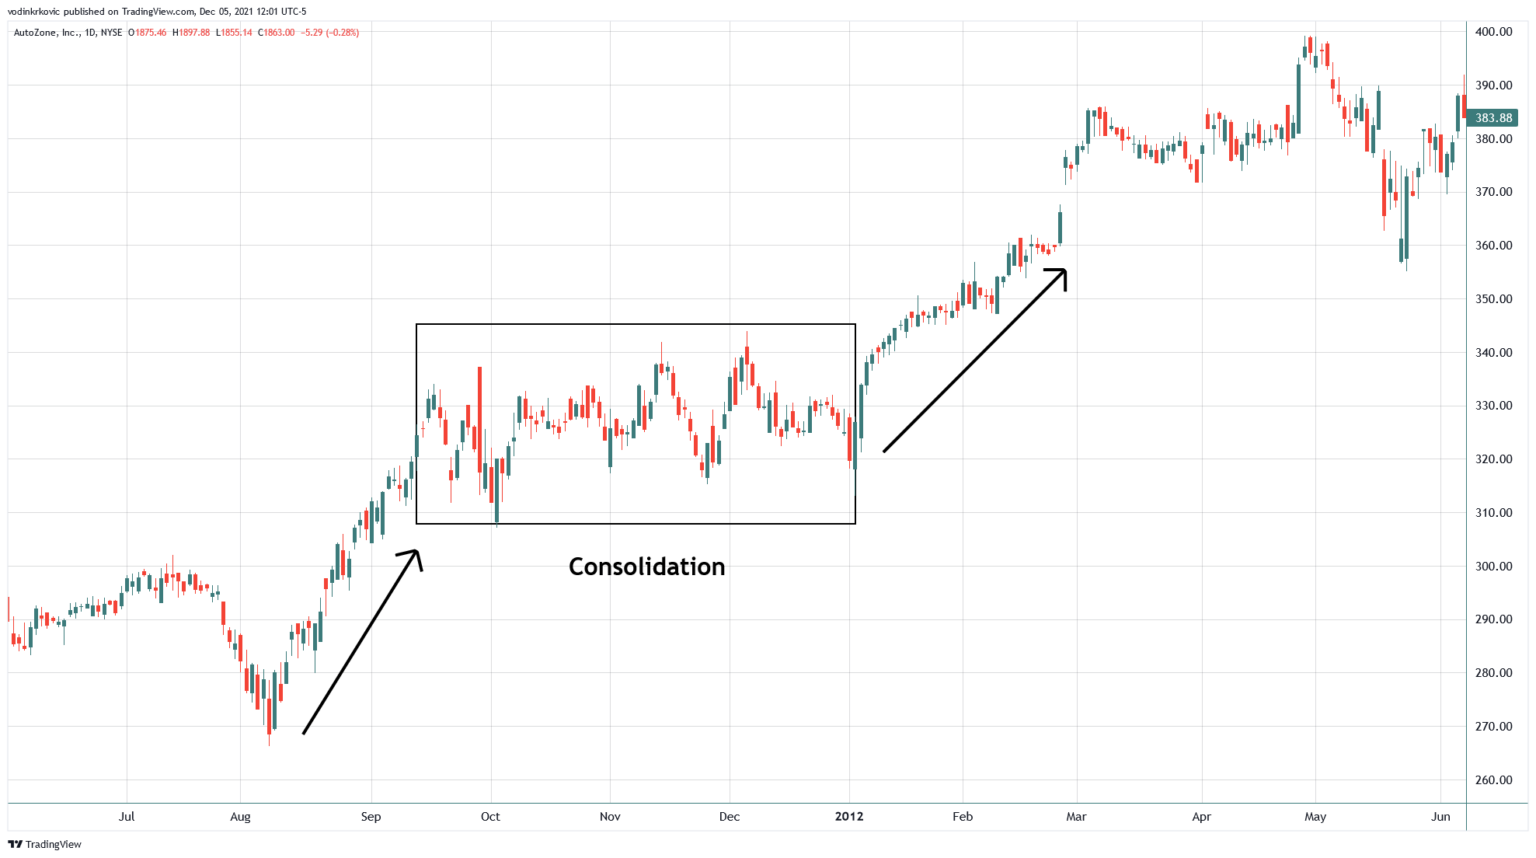

Source: https://tokenist.com/investing/stock-consolidation/

### CUSUM Formula (Detecting Increase)

$S_t = max{\{0, S_{t-1} + (x_t - \mu - C)\}}$

Is $S_t \geq T$ ?

### Choice of Parameters

|Parameter|Choice|
|---|---|
|$\mu$ |Midpoint between upper and lower bound of consolidation zone|
|Critical Value (C) |Can be Zero. Because there is no cost for a highly-sensitive model.|
|Threshold (T) |Half distance between upper and lower bound of consolidation zone <br/> **MULTIPLIED** by 1.5 of the Average True Range of the recent prices.|

---

## Question 6.2

1.	Using July through October daily-high-temperature data for Atlanta for 1996 through 2015, use a CUSUM approach to identify when unofficial summer ends (i.e., when the weather starts cooling off) each year.  You can get the data that you need from the file temps.txt or online, for example at http://www.iweathernet.com/atlanta-weather-records  or https://www.wunderground.com/history/airport/KFTY/2015/7/1/CustomHistory.html .  You can use R if you’d like, but it’s straightforward enough that an Excel spreadsheet can easily do the job too.

2.	Use a CUSUM approach to make a judgment of whether Atlanta’s summer climate has gotten warmer in that time (and if so, when).

### 6.2.1

In [10]:
temps<-read.table("C:\\Users\\redoc\\OneDrive\\Desktop\\GTx Masters OMSA\\GTx - ISYE6501x Introduction to Analytics Modelling\\Week 3\\HW3\\Data\\temps.txt", header=TRUE)

In [11]:
head(temps, 10)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
1-Jul,98,86,91,84,89,84,90,73,82,...,93,95,85,95,87,92,105,82,90,85
2-Jul,97,90,88,82,91,87,90,81,81,...,93,85,87,90,84,94,93,85,93,87
3-Jul,97,93,91,87,93,87,87,87,86,...,93,82,91,89,83,95,99,76,87,79
4-Jul,90,91,91,88,95,84,89,86,88,...,91,86,90,91,85,92,98,77,84,85
5-Jul,89,84,91,90,96,86,93,80,90,...,90,88,88,80,88,90,100,83,86,84
6-Jul,93,84,89,91,96,87,93,84,90,...,81,87,82,87,89,90,98,83,87,84
7-Jul,93,75,93,82,96,87,89,87,89,...,80,82,88,86,94,94,93,79,89,90
8-Jul,91,87,95,86,91,89,89,90,87,...,82,82,90,82,97,94,95,88,90,90
9-Jul,93,84,95,87,96,91,90,89,88,...,84,89,89,84,96,91,97,88,90,91
10-Jul,93,87,91,87,99,87,91,84,89,...,84,86,87,84,90,92,95,87,87,93


In [28]:
head(temps[,-1])

X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
98,86,91,84,89,84,90,73,82,91,93,95,85,95,87,92,105,82,90,85
97,90,88,82,91,87,90,81,81,89,93,85,87,90,84,94,93,85,93,87
97,93,91,87,93,87,87,87,86,86,93,82,91,89,83,95,99,76,87,79
90,91,91,88,95,84,89,86,88,86,91,86,90,91,85,92,98,77,84,85
89,84,91,90,96,86,93,80,90,89,90,88,88,80,88,90,100,83,86,84
93,84,89,91,96,87,93,84,90,82,81,87,82,87,89,90,98,83,87,84


### Feature Engineering

#### Part 1 - Average across all years
I will add a new column which averages the daily-high temperature for each day across **all years**. 

In [29]:
temps$Mean <- rowMeans(temps[,-1]) # temps[,-1] picks all columns except for the first column

In [30]:
head(temps)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,Mean
1-Jul,98,86,91,84,89,84,90,73,82,...,95,85,95,87,92,105,82,90,85,88.85
2-Jul,97,90,88,82,91,87,90,81,81,...,85,87,90,84,94,93,85,93,87,88.35
3-Jul,97,93,91,87,93,87,87,87,86,...,82,91,89,83,95,99,76,87,79,88.40
4-Jul,90,91,91,88,95,84,89,86,88,...,86,90,91,85,92,98,77,84,85,88.35
5-Jul,89,84,91,90,96,86,93,80,90,...,88,88,80,88,90,100,83,86,84,88.25
6-Jul,93,84,89,91,96,87,93,84,90,...,87,82,87,89,90,98,83,87,84,87.85


#### Part 2 - Average Temp of all Days ($\mu$)

Now I will compute the mean temperature across all days. This is the value $\mu$.

In [35]:
temps$Mu <- mean(temps$Mean)

In [41]:
head(temps)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,Mean,Mu
1-Jul,98,86,91,84,89,84,90,73,82,...,85,95,87,92,105,82,90,85,88.85,83.33902
2-Jul,97,90,88,82,91,87,90,81,81,...,87,90,84,94,93,85,93,87,88.35,83.33902
3-Jul,97,93,91,87,93,87,87,87,86,...,91,89,83,95,99,76,87,79,88.40,83.33902
4-Jul,90,91,91,88,95,84,89,86,88,...,90,91,85,92,98,77,84,85,88.35,83.33902
5-Jul,89,84,91,90,96,86,93,80,90,...,88,80,88,90,100,83,86,84,88.25,83.33902
6-Jul,93,84,89,91,96,87,93,84,90,...,82,87,89,90,98,83,87,84,87.85,83.33902


#### Part 3 - Residue Column

This column contains the difference between Mean Temp across all years and the value of $\mu$

In [42]:
temps$residue <- temps$Mean - temps$Mu

In [43]:
head(temps)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2009,X2010,X2011,X2012,X2013,X2014,X2015,Mean,Mu,residue
1-Jul,98,86,91,84,89,84,90,73,82,...,95,87,92,105,82,90,85,88.85,83.33902,5.510976
2-Jul,97,90,88,82,91,87,90,81,81,...,90,84,94,93,85,93,87,88.35,83.33902,5.010976
3-Jul,97,93,91,87,93,87,87,87,86,...,89,83,95,99,76,87,79,88.40,83.33902,5.060976
4-Jul,90,91,91,88,95,84,89,86,88,...,91,85,92,98,77,84,85,88.35,83.33902,5.010976
5-Jul,89,84,91,90,96,86,93,80,90,...,80,88,90,100,83,86,84,88.25,83.33902,4.910976
6-Jul,93,84,89,91,96,87,93,84,90,...,87,89,90,98,83,87,84,87.85,83.33902,4.510976


### Time Series Plot 

#### Installing Libraries

In [4]:
install.packages("TSstudio")
install.packages("ggplot2")

also installing the dependencies 'cli', 'lifecycle', 'rlang', 'scales', 'vctrs'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
cli        2.5.0  3.6.0              TRUE
lifecycle  1.0.0  1.0.3             FALSE
rlang     0.4.11  1.0.6              TRUE
scales     1.1.1  1.2.1             FALSE
vctrs      0.3.8  0.5.2              TRUE
ggplot2    3.3.3  3.4.0             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\redoc\anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\redoc\anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'vctrs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\redoc\AppData\Local\Temp\Rtmp0kCY3L\downloaded_packages


installing the source packages 'lifecycle', 'scales', 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("ggplot2"):
"installation of package 'scales' had non-zero exit status"Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"

In [5]:
library(TSstudio)
library(ggplot2)

ERROR: Error in library(ggplot2): there is no package called 'ggplot2'


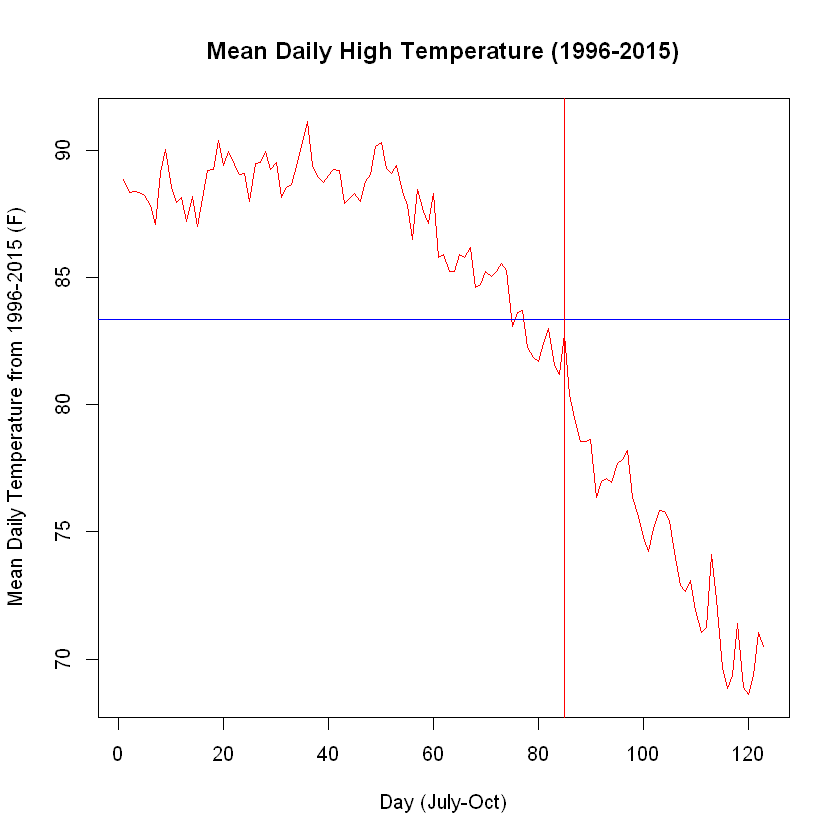

In [96]:
plot(temps$Mean,type = "l",col = "red", xlab = "Day (July-Oct)", ylab = "Mean Daily Temperature from 1996-2015 (F)", main="Mean Daily High Temperature (1996-2015)")

abline(h=temps$Mu, col="blue")

abline(v=85,col="red")
       
# lines(temps$X1997,col = "blue")

In the graph above, there appears to be a sharp drop in temperature after the **85th day** (vertical red line) in the time-series. I the number 85 as the value for T.

#### Residue Plot (CUSUM)

Recall the CUSUM Formula 

$S_t = max{\{0, S_{t-1} + (x_t - \mu - C)\}}$

Detect if $S_t \geq T$ 

Let C = 0

In [84]:
C <- 0

In [85]:
temps$residueMinusC <- temps$residue-C

In [86]:
head(temps,2)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2010,X2011,X2012,X2013,X2014,X2015,Mean,Mu,residue,residueMinusC
1-Jul,98,86,91,84,89,84,90,73,82,...,87,92,105,82,90,85,88.85,83.33902,5.510976,5.510976
2-Jul,97,90,88,82,91,87,90,81,81,...,84,94,93,85,93,87,88.35,83.33902,5.010976,5.010976


In [87]:
cusum<-c(0) # create cusum list which ignores index 0 as we will start at index 1 in the for loop below

In [88]:
cusum[1]

[1] 0

In [89]:
is.numeric(cusum[1])

[1] TRUE

In [90]:
temps$residueMinusC[2]

[1] 5.010976

In [91]:
for (i in 1:length(temps$residue))
    {
    check<-cusum[i]+temps$residueMinusC[i]
    
    ifelse(check >0, cusum[i+1]<-check, cusum[i+1]<-0)
}

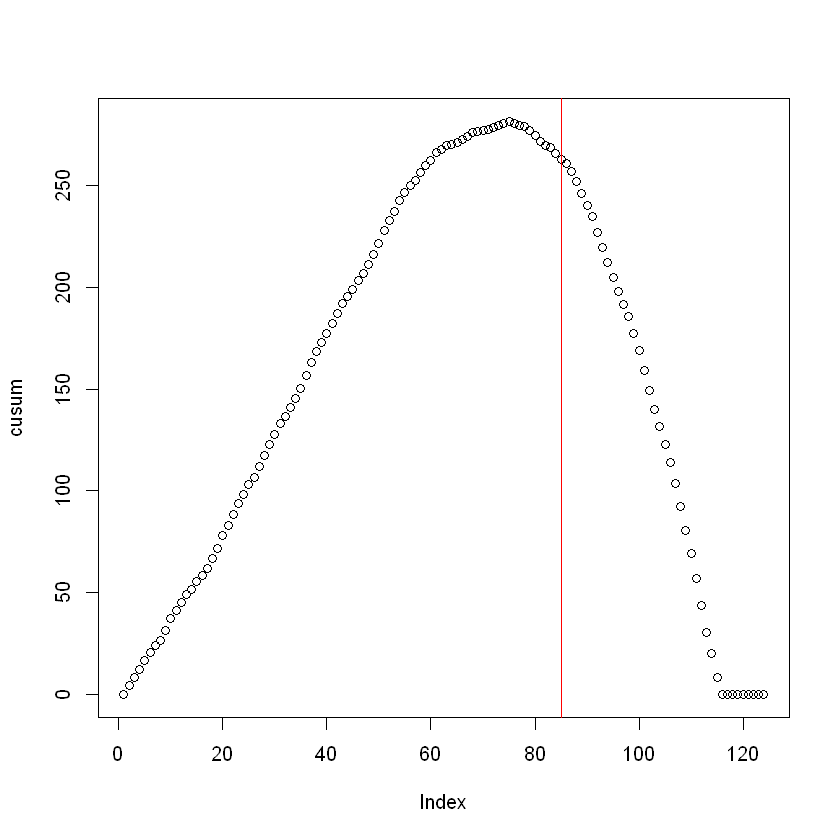

In [97]:
plot(cusum)

abline(v=85,col="red")


In the plot above, the change is not detected.

#### Termination Conditions

The formula $S_t = max{\{0, S_{t-1} + (x_t - \mu - C)\}}$

is for detecting increase. So in the case of finding out when Summer Ends, we can check the termination of the function ie when it hits **zero**.

I will adjust the C value through trial-and-error.

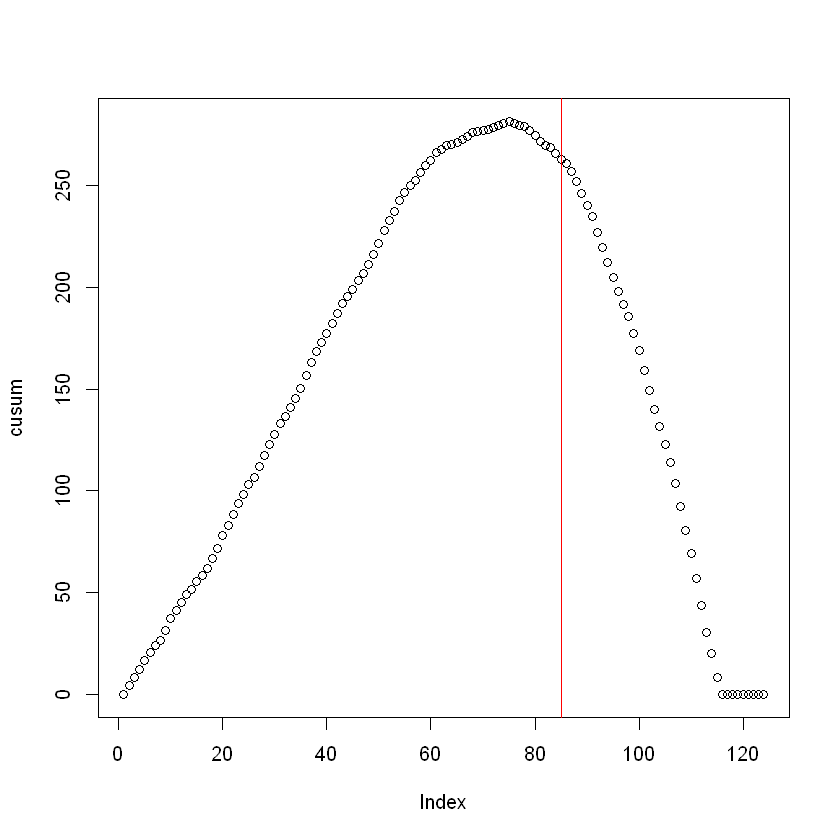

In [98]:
C <- 1

temps$residueMinusC <- temps$residue-C

cusum<-c(0) # create cusum list which ignores index 0 as we will start at index 1 in the for loop below

for (i in 1:length(temps$residue))
    {
    check<-cusum[i]+temps$residueMinusC[i]
    
    ifelse(check >0, cusum[i+1]<-check, cusum[i+1]<-0)
}

plot(cusum)

abline(v=85,col="red")


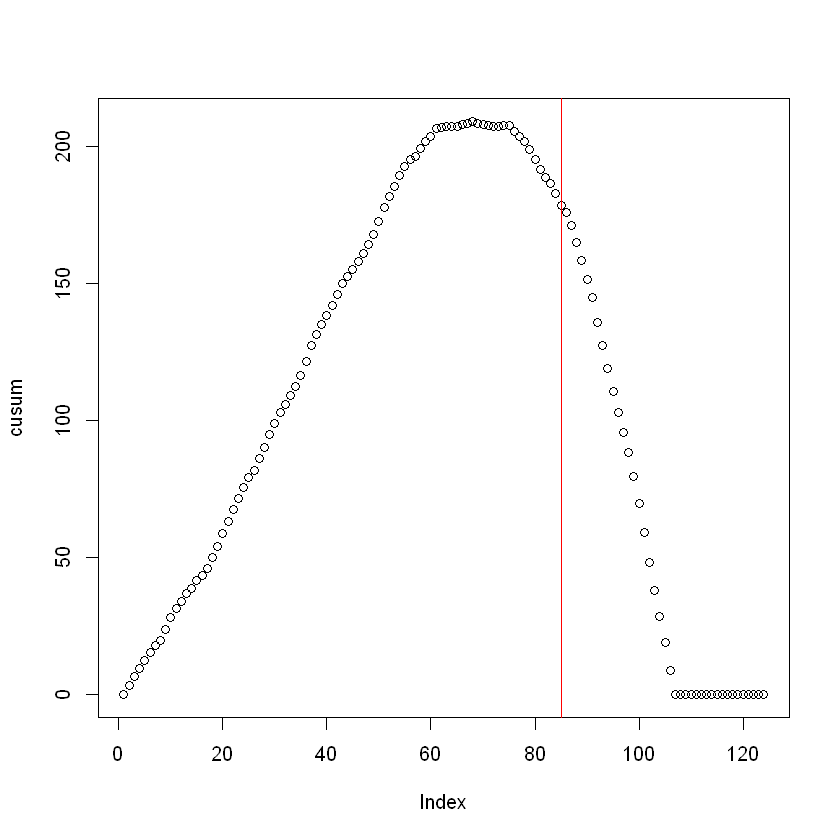

In [99]:
C <- 2

temps$residueMinusC <- temps$residue-C

cusum<-c(0) # create cusum list which ignores index 0 as we will start at index 1 in the for loop below

for (i in 1:length(temps$residue))
    {
    check<-cusum[i]+temps$residueMinusC[i]
    
    ifelse(check >0, cusum[i+1]<-check, cusum[i+1]<-0)
}

plot(cusum)

abline(v=85,col="red")

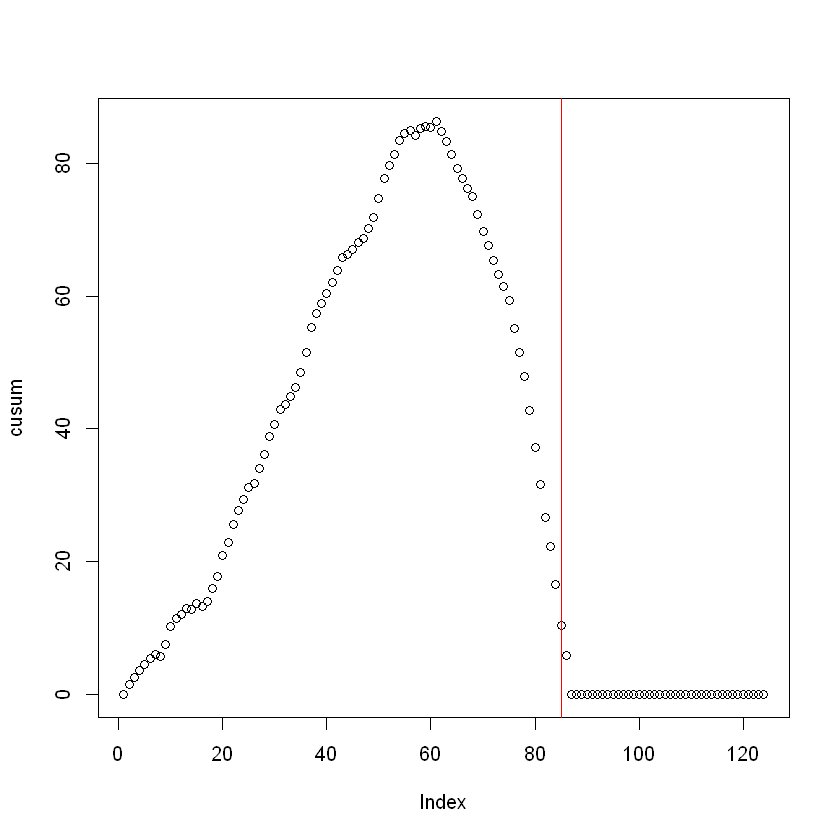

In [100]:
C <- 4

temps$residueMinusC <- temps$residue-C

cusum<-c(0) # create cusum list which ignores index 0 as we will start at index 1 in the for loop below

for (i in 1:length(temps$residue))
    {
    check<-cusum[i]+temps$residueMinusC[i]
    
    ifelse(check >0, cusum[i+1]<-check, cusum[i+1]<-0)
}

plot(cusum)

abline(v=85,col="red")

In the last graph we can see that the CUSUM hits zero after the 85th day, indicating that the temperature no longer increases and that a new season is approaching.

The parameters of choice are:<br>
$C = 4$ <br>
$T = 85$

### 6.2.2

Prior to the CUSUM levelling at the Zero value, the temperature peaks on the 60th day in the time-series. Moreover, we can observe from the spread of data points after the peak that the drop in temperature in occuring at an increasing rate, leading up to the change in seasons.

---

---